(-0.5, 599.5, 399.5, -0.5)

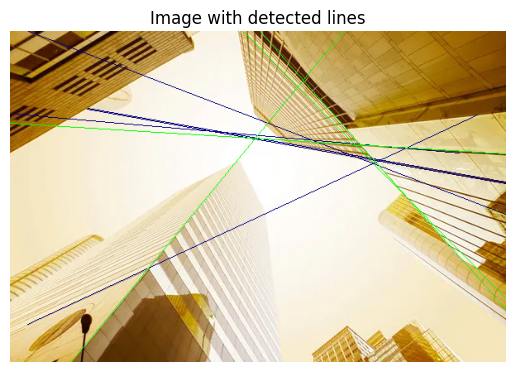

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/building.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 200, 250, apertureSize=3)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=500, maxLineGap=250)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 128), 1)

# fine tune parameters
lines = cv2.HoughLines(
    edges, 0.7, np.pi / 120, 120, min_theta=np.pi / 36, max_theta=np.pi - np.pi / 36
)
for line in lines:
    rho, theta = line[0]
    # skip near-vertical lines
    if abs(theta - np.pi / 90) < np.pi / 9:
        continue
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 10000 * (-b))
    y1 = int(y0 + 10000 * (a))
    x2 = int(x0 - 10000 * (-b))
    y2 = int(y0 - 10000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 1)

plt.imshow(img)
plt.title("Image with detected lines"), plt.xticks([]), plt.yticks([])
plt.axis("off")